# Make behavioral plots 
- running rate average trial response for 3 cues per stage
- licking rate average trial response for 3 cues per stage
- pupil average trial response for 3 cues per stage (% of maximum dialation) 
- binned pillow parsed_11stage --> add pillow (simple to meta) function maybe? 
- pillow aligned to reversal
    - single mouse traces
    - mean and sem across mice
- pillow align to initial learning
    - single mouse traces
    - mean and sem across mice

In [ ]:
%load_ext autoreload
%autoreload 2
import cascade as cas
import flow
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd
import warnings
from cascade import utils
from scipy.stats import pearsonr
from copy import deepcopy

In [2]:
# set parameters
mice = cas.lookups.mice['all12']
# words = ['facilitate'] * len(mice)
words = ['bookmarks' if s in 'OA27' else 'horrible' for s in mice]
group_by = 'all3'

rank_level_sort = 15

# load in a full size tensor
model_list = []
tensor_list = []
id_list = []
bhv_list = []
meta_list = []
for mouse, word in zip(mice, words):
    
    # return   model, ids, tensor, meta, bhv
    out = cas.load.load_all_groupday(mouse, word=word, with_model=True, group_by=group_by, nan_thresh=0.95)
#     sorted_model, sort_order = utils.sortfactors(out[0])
#     model_list.append(sorted_model)
#     tensor_list.append(out[2][sort_order[rank_level_sort - 1], :, :])
#     id_list.append(out[1][sort_order[rank_level_sort - 1]])
    bhv_list.append(out[4])
    meta_list.append(utils.add_stages_to_meta(out[3], 'parsed_11stage'))

Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match le

## figureing out how to add lick rate to bhv traces

In [3]:
import flow

In [68]:
m = flow.Mouse('OA27')
d = m.dates()[7]
r = d.runs()[0]
t2p = r.trace2p()
# csbehaviortraces(
#             self, cs, start_s=-1, end_s=None, trace_type='pupil',
#             cutoff_before_lick_ms=-1, errortrials=-1, baseline=None,
#             baseline_to_stimulus=True)

In [84]:
run_traces = t2p.csbehaviortraces('', start_s=-1, end_s=6,
                                  trace_type='lick_rate',
                                  errortrials=-1,
                                  baseline_to_stimulus=False,
                                  baseline=None,
                                  cutoff_before_lick_ms=-1)

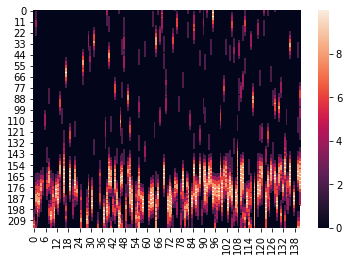

In [86]:
sns.heatmap(np.squeeze(run_traces));

In [47]:
instantaneous_licks = np.zeros(t2p.nframes)
if len(instantaneous_licks) > 0:
    instantaneous_licks[t2p.licking()] = 1
    intfr = int(np.ceil(t2p.framerate))
    instantaneous_licks = instantaneous_licks*intfr
    lick_rate = np.convolve(instantaneous_licks, np.ones(intfr, dtype=np.float32)/intfr, mode='same')
    
#     conv = np.zeros(int(round(ili*self.framerate)) - 1)
#     conv[int(round(len(conv)/2)):] = 1
#     conv = np.concatenate([np.zeros(intfr, dtype=np.float32), np.ones(intfr, dtype=np.float32)/intfr])
    conv = np.concatenate([np.zeros(int(np.ceil(intfr/2)), dtype=np.float32), np.ones(int(np.ceil(intfr/2)), dtype=np.float32)/intfr*2])
#     lickbout = np.convolve(lickbout, conv, 'same')
    lick_rate = np.convolve(instantaneous_licks, conv, mode='same')
# #   return lick_rate

In [48]:
conv

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06451613, 0.06451613, 0.06451613, 0.06451613,
       0.06451613, 0.06451613, 0.06451613, 0.06451613, 0.06451613,
       0.06451613, 0.06451613, 0.06451613, 0.06451613, 0.06451613,
       0.06451613, 0.06451613], dtype=float32)

(500.0, 1000.0)

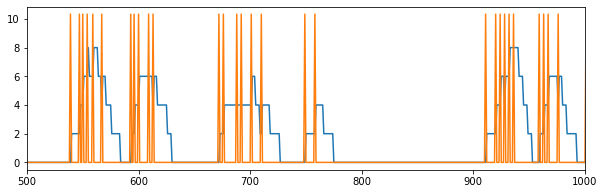

In [49]:
plt.figure(figsize=(10, 3))
plt.plot(lick_rate)
plt.plot(instantaneous_licks/3)
plt.xlim([500, 1000])

## check that it worked!

In [2]:
# set parameters
mice = cas.lookups.mice['all12']
# words = ['facilitate'] * len(mice)
words = ['colleges' if s in 'OA27' else 'coaching' for s in mice]
group_by = 'all3'

rank_level_sort = 15

# load in a full size tensor
model_list = []
tensor_list = []
id_list = []
bhv_list = []
meta_list = []
for mouse, word in zip(mice, words):
    
    # return   model, ids, tensor, meta, bhv
    out = cas.load.load_all_groupday(mouse, word=word, with_model=True, group_by=group_by, nan_thresh=0.75)
#     sorted_model, sort_order = utils.sortfactors(out[0])
#     model_list.append(sorted_model)
#     tensor_list.append(out[2][sort_order[rank_level_sort - 1], :, :])
#     id_list.append(out[1][sort_order[rank_level_sort - 1]])
    bhv_list.append(out[4])
    meta_list.append(utils.add_stages_to_meta(out[3], 'parsed_11stage'))
    
#     break

Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match le

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: Mean of empty s

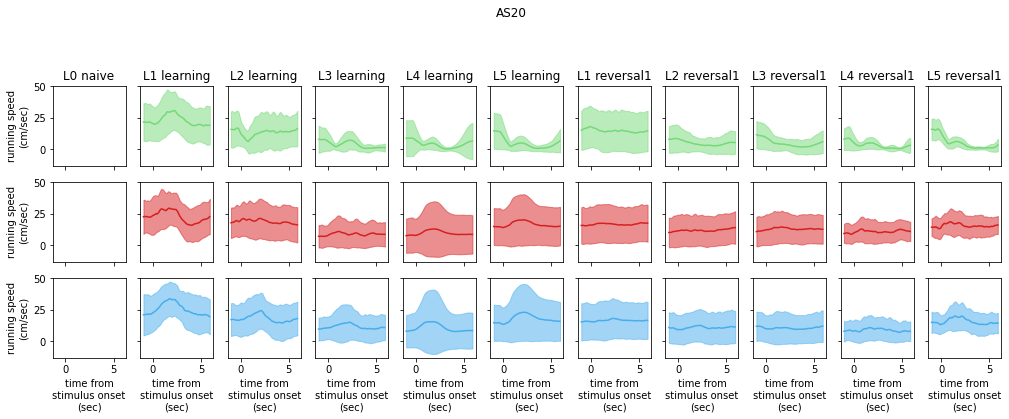

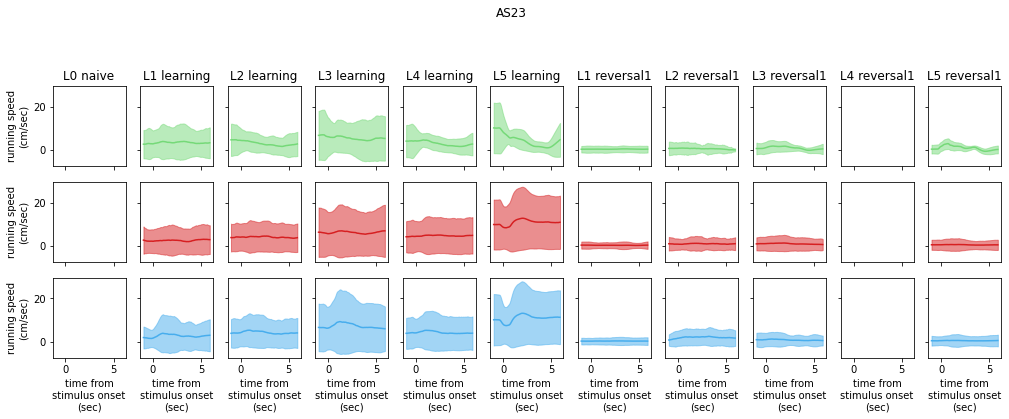

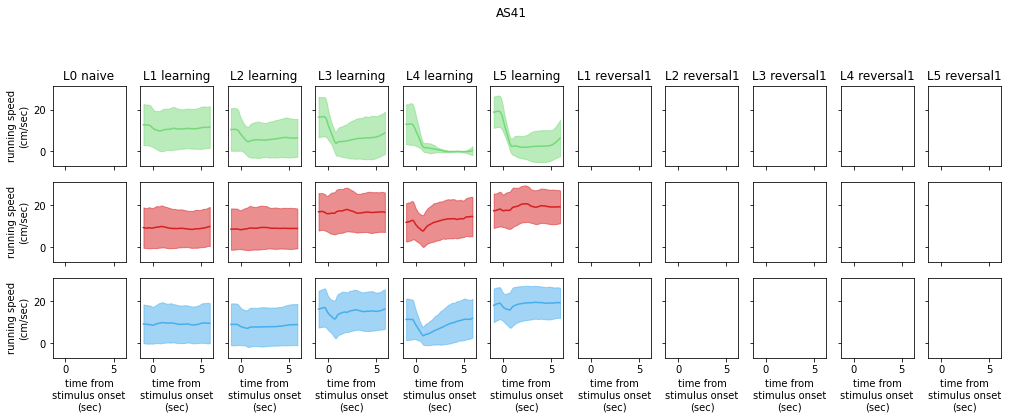

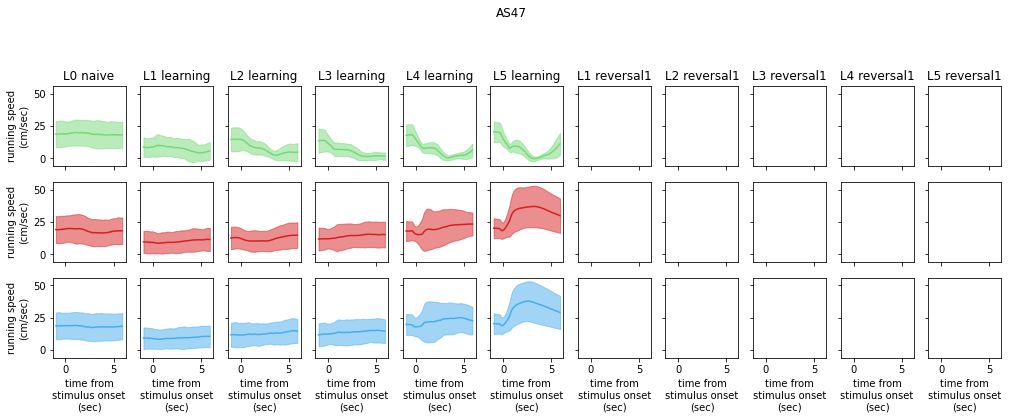

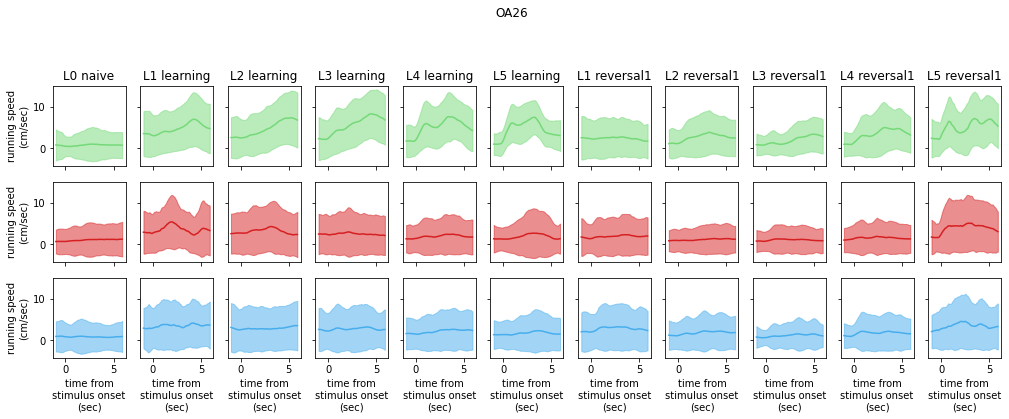

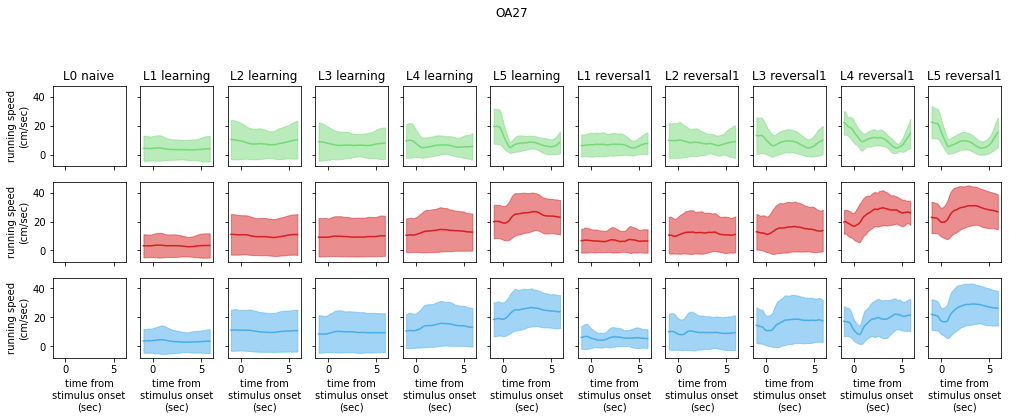

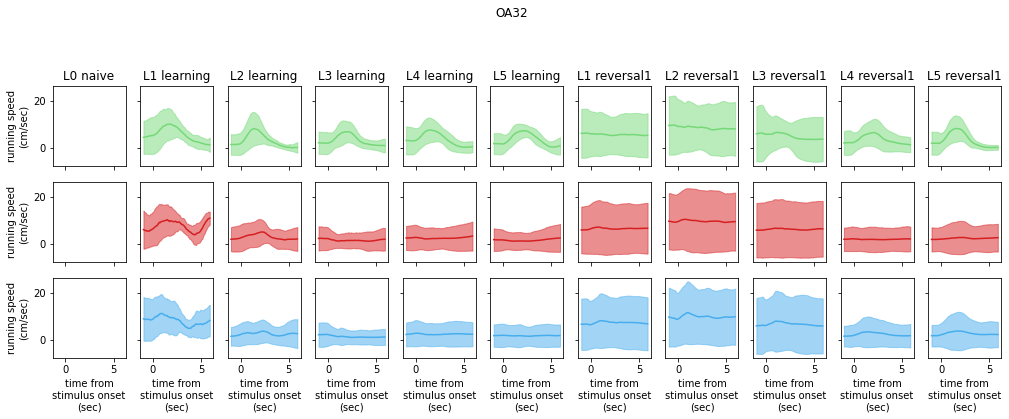

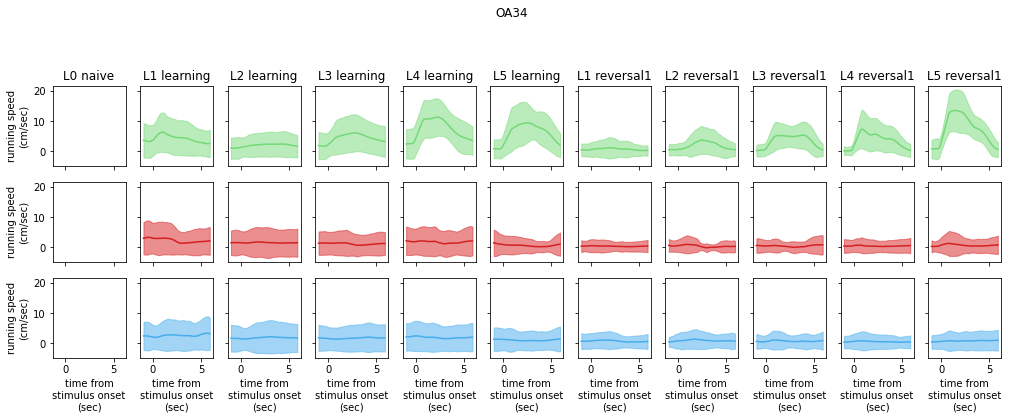

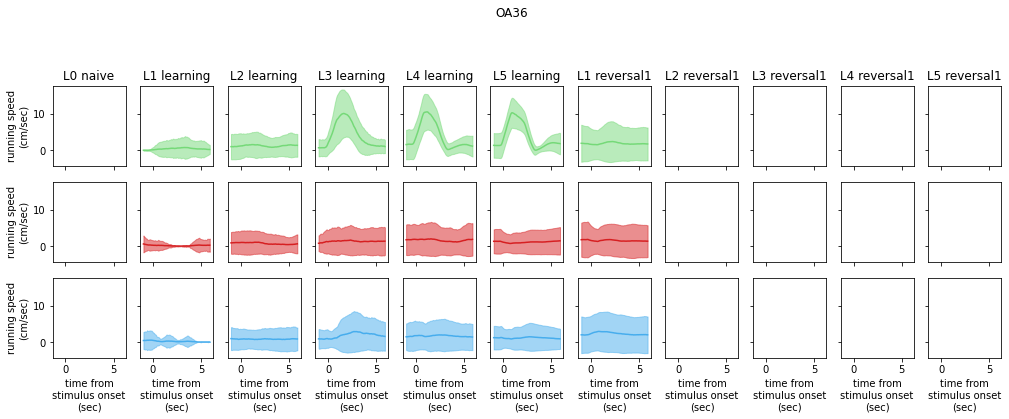

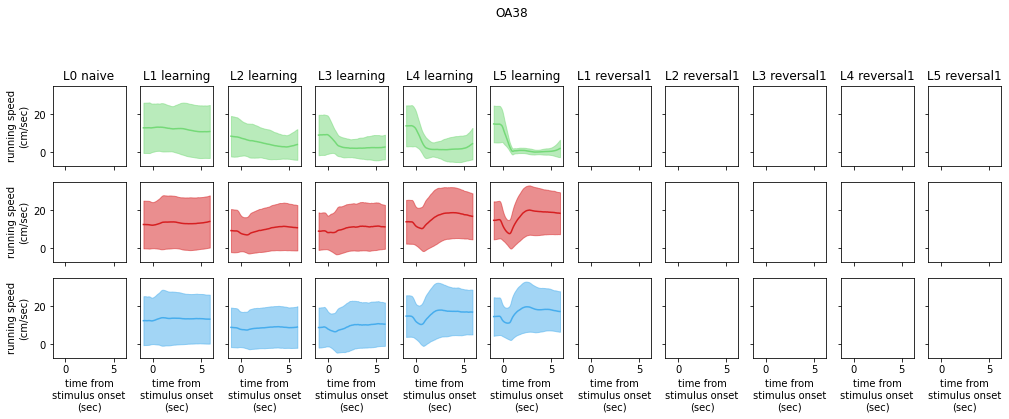

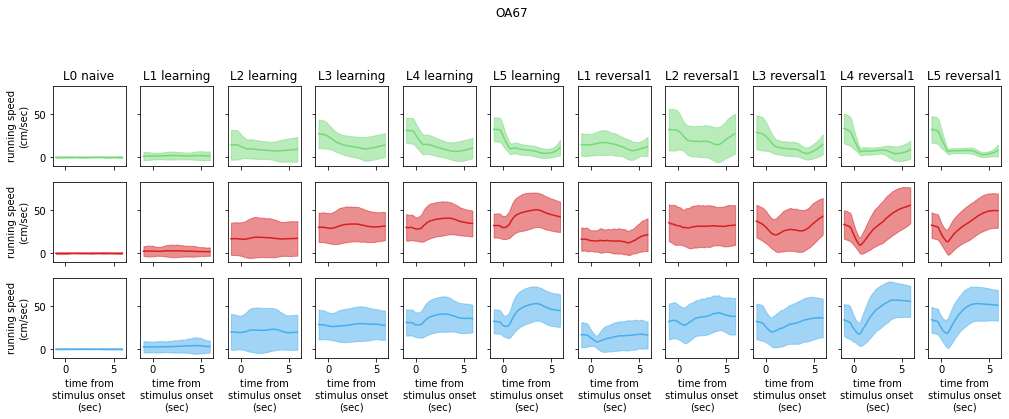

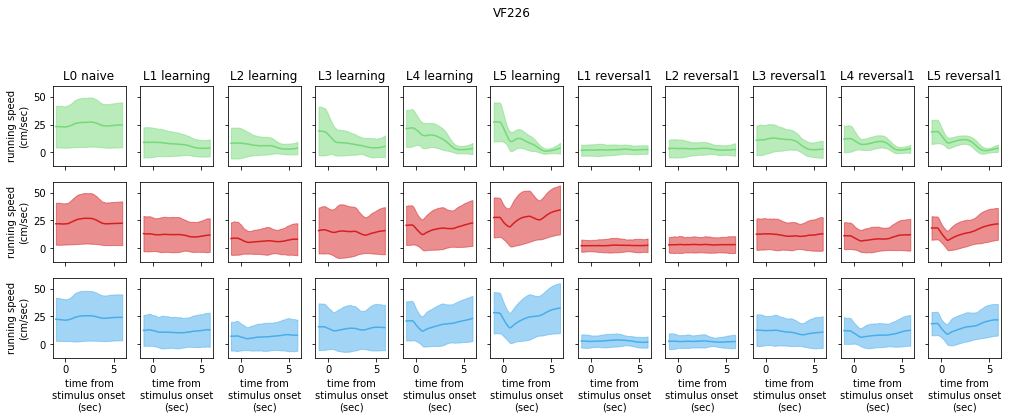

In [17]:
#     sem = np.nanstd(flat_mat_learn, axis=0)/np.sqrt(np.sum(~np.isnan(flat_mat_learn), axis=0))
for meta, bhv in zip(meta_list, bhv_list):
    staging = 'parsed_11stage'

    # keep dim to make 3d math work
    tensor = bhv[4, :, :][None, :, :]

    # staging must exist in your df
    meta = cas.utils.add_stages_to_meta(meta, staging)
    assert staging in meta.columns

    # get average response per stage
    stages = cas.lookups.staging[staging]
    new_tensor = np.zeros((3, tensor.shape[1], len(stages)))
    new_tensor[:] = np.nan
    std_tensor = np.zeros((3, tensor.shape[1], len(stages)))
    std_tensor[:] = np.nan
    for c, di in enumerate(stages):
        stage_boo = meta[staging].isin([di]).values
        for c_cue, cue in enumerate(['plus', 'minus', 'neutral']):
            cue_boo = meta.condition.isin([cue]).values
            new_tensor[c_cue, :, c] = np.nanmean(tensor[:, :, stage_boo & cue_boo], axis=2)
            std_tensor[c_cue, :, c] = np.nanstd(tensor[:, :, stage_boo & cue_boo], axis=2)
    
    fig, ax = plt.subplots(3,11, figsize=(17,5), sharex=True, sharey=True)
    ax = np.reshape(ax, [3, 11])
    x_vals = np.arange(108)/15.5 - 1
    for c, di in enumerate(stages):
        for c_cue, cue in enumerate(['plus', 'minus', 'neutral']):
            ax[c_cue,c].plot(x_vals, new_tensor[c_cue, :, c], color=cas.lookups.color_dict[cue])
            ax[c_cue,c].fill_between(x_vals,
                                     new_tensor[c_cue, :, c]-std_tensor[c_cue, :, c],
                                     new_tensor[c_cue, :, c]+std_tensor[c_cue, :, c],
                                     color=cas.lookups.color_dict[cue],
                                     alpha=0.5)
            if c_cue == 0:
                ax[c_cue,c].set_title(di, size=12)
            if c_cue == 2:
                ax[c_cue,c].set_xlabel('time from\nstimulus onset\n(sec)')
            if c == 0:
#                 ax[c_cue,c].set_ylabel('lick rate\n(licks/sec)')
                ax[c_cue,c].set_ylabel('running speed\n(cm/sec)')
    
    fig.suptitle(f'{meta.reset_index().mouse.unique()[0]}', position=(0.5, 1.1))
    
    mouse = meta.reset_index().mouse.unique()[0]
#     plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/bhv_summary/Lick_rate_PMN_{mouse}_stages.pdf',
#                 bbox_inches='tight')
    plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/bhv_summary/Speed_PMN_{mouse}_stages.pdf',
                bbox_inches='tight')
    
#     break

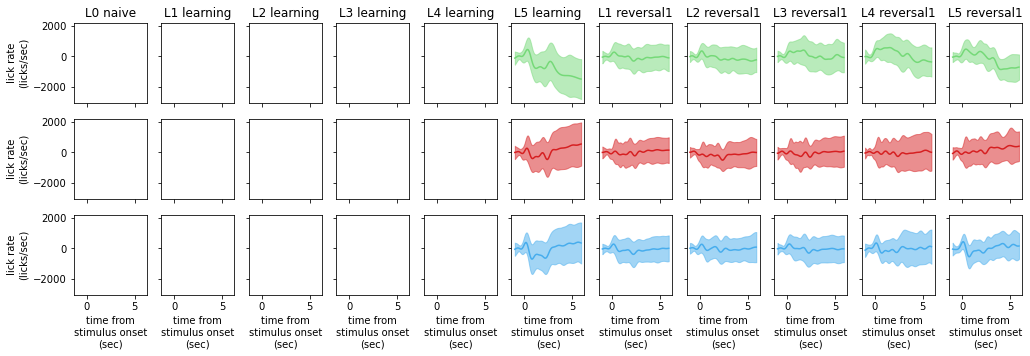

In [117]:
fig, ax = plt.subplots(3,11, figsize=(17,5), sharex=True, sharey=True)
ax = np.reshape(ax, [3, 11])
x_vals = np.arange(108)/15.5 - 1
for c, di in enumerate(stages):
    for c_cue, cue in enumerate(['plus', 'minus', 'neutral']):
        ax[c_cue,c].plot(x_vals, new_tensor[c_cue, :, c], color=cas.lookups.color_dict[cue])
        ax[c_cue,c].fill_between(x_vals,
                                 new_tensor[c_cue, :, c]-std_tensor[c_cue, :, c],
                                 new_tensor[c_cue, :, c]+std_tensor[c_cue, :, c],
                                 color=cas.lookups.color_dict[cue],
                                 alpha=0.5)
        if c_cue == 0:
            ax[c_cue,c].set_title(di, size=12)
        if c_cue == 2:
            ax[c_cue,c].set_xlabel('time from\nstimulus onset\n(sec)')
        if c == 0:
            ax[c_cue,c].set_ylabel('lick rate\n(licks/sec)')